In [1]:
from models.TorchClassifier import TorchClassifier
from Embeddings import Embeddings
import time
import utils
from sklearn.model_selection import train_test_split
import torch
from pprint import pprint
from models.FFNN import FFNN

In [2]:
# Create the embeddings object
embeddings = Embeddings('data/doc2vec.npy', 'data/bert.npy', 'data/authors.npy', 'data/authors_encoded.npy', 'pickles/author_encoder.pkl')

In [3]:
def run_ffnn(X, y, figure_title, scale_features=True):
    if scale_features:
        X = torch.from_numpy(utils.scale_feature_matrix(X)).float()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = TorchClassifier(FFNN, input_dim=768, hidden_dim=128, output_dim=20)
    # Find the best hyperparameters
    start = time.time()
    clf.train(X_train, y_train, epochs=30, lr=0.0001)
    print('Training time: ', time.time() - start)
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

In [4]:
# Load the feature matrix and labels
X = embeddings.get_doc2vec(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)

Epoch 1/30, Loss: 2.5592966079711914
Epoch 2/30, Loss: 3.2961502075195312
Epoch 3/30, Loss: 2.3554153442382812
Epoch 4/30, Loss: 2.7201695442199707
Epoch 5/30, Loss: 2.7138190269470215
Epoch 6/30, Loss: 1.8334981203079224
Epoch 7/30, Loss: 2.9552347660064697
Epoch 8/30, Loss: 1.4309059381484985
Epoch 9/30, Loss: 1.5190364122390747
Epoch 10/30, Loss: 2.2089853286743164
Epoch 11/30, Loss: 1.6195439100265503
Epoch 12/30, Loss: 1.5780363082885742
Epoch 13/30, Loss: 2.2705321311950684
Epoch 14/30, Loss: 1.6358004808425903
Epoch 15/30, Loss: 3.9735629558563232
Epoch 16/30, Loss: 5.272328853607178
Epoch 17/30, Loss: 1.7712857723236084
Epoch 18/30, Loss: 2.4941067695617676
Epoch 19/30, Loss: 1.879698634147644
Epoch 20/30, Loss: 2.630709409713745
Epoch 21/30, Loss: 0.5682798624038696
Epoch 22/30, Loss: 2.5067601203918457
Epoch 23/30, Loss: 4.3674492835998535
Epoch 24/30, Loss: 2.322380304336548
Epoch 25/30, Loss: 4.683655738830566
Epoch 26/30, Loss: 1.4828078746795654
Epoch 27/30, Loss: 2.35494

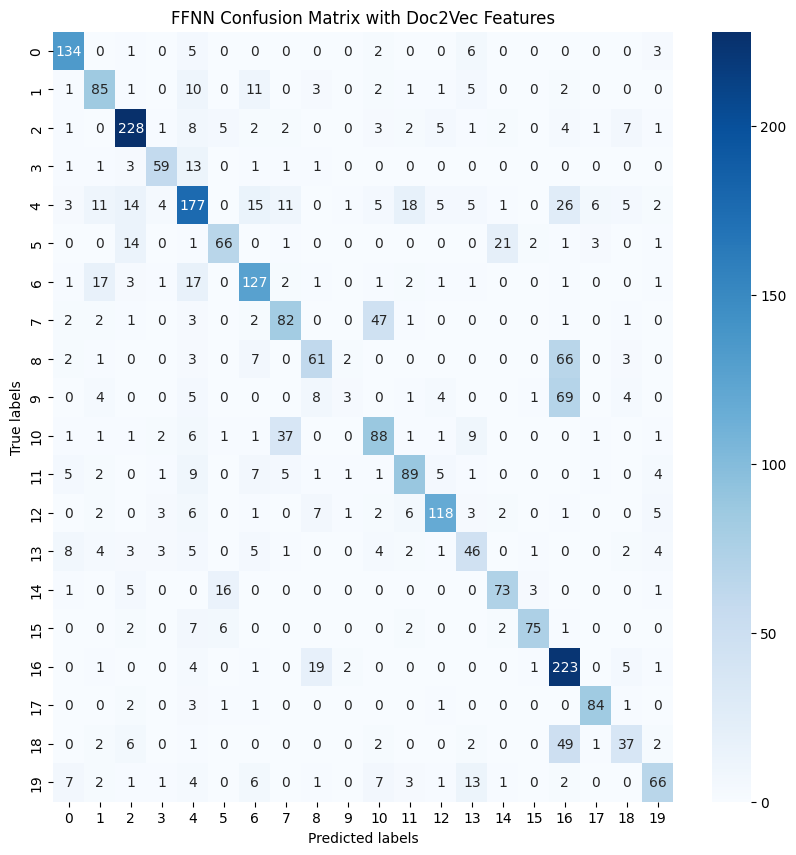

In [5]:
# Run the network with the Doc2Vec Features
run_ffnn(X, y, 'FFNN Confusion Matrix with Doc2Vec Features', scale_features=True)

In [6]:
# Load the BERT embeddings
X = embeddings.get_bert(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)

Epoch 1/30, Loss: 2.3613810539245605
Epoch 2/30, Loss: 3.1071157455444336
Epoch 3/30, Loss: 3.626905918121338
Epoch 4/30, Loss: 1.9851956367492676
Epoch 5/30, Loss: 2.0155844688415527
Epoch 6/30, Loss: 3.345149040222168
Epoch 7/30, Loss: 2.653207778930664
Epoch 8/30, Loss: 3.5017616748809814
Epoch 9/30, Loss: 1.2581062316894531
Epoch 10/30, Loss: 2.33162260055542
Epoch 11/30, Loss: 1.077337384223938
Epoch 12/30, Loss: 1.714219570159912
Epoch 13/30, Loss: 5.452524662017822
Epoch 14/30, Loss: 2.7776100635528564
Epoch 15/30, Loss: 0.7654200196266174
Epoch 16/30, Loss: 0.7175768613815308
Epoch 17/30, Loss: 2.5547947883605957
Epoch 18/30, Loss: 2.9443318843841553
Epoch 19/30, Loss: 1.526041030883789
Epoch 20/30, Loss: 1.2673393487930298
Epoch 21/30, Loss: 1.173593521118164
Epoch 22/30, Loss: 0.6837639808654785
Epoch 23/30, Loss: 0.4064151644706726
Epoch 24/30, Loss: 1.3652399778366089
Epoch 25/30, Loss: 5.246367454528809
Epoch 26/30, Loss: 4.318136215209961
Epoch 27/30, Loss: 3.865144968032

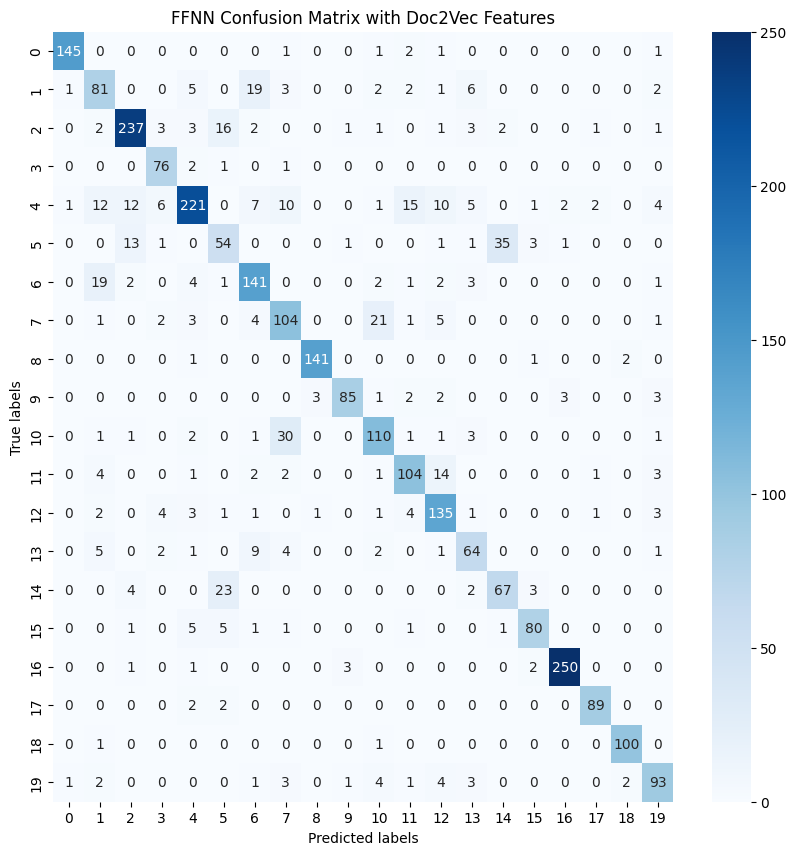

In [7]:
# Run the network with the BERT Features
run_ffnn(X, y, 'FFNN Confusion Matrix with Doc2Vec Features', scale_features=True)